# K-means Project Tutorial

## House grouping system

Loading the dataset

In [1]:
import pandas as pd
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
total_data.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [3]:
#Eliminating non-necessary columns
total_data.drop(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], axis = 1, inplace = True)
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
from sklearn.model_selection import train_test_split

#Splitting total_data into train and test

X_train, X_test = train_test_split(total_data, test_size = 0.2, random_state = 8)

X_train.head()

,MedInc,Latitude,Longitude
17875,5.3912,37.40,-121.99
9360,3.5838,37.95,-122.53
4338,2.7038,34.08,-118.31
986,10.3203,37.72,-121.85
8129,3.5313,33.80,-118.17


Build a K-Means

In [5]:
import numpy as np
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 8)
model.fit(X_train)



KMeans(n_clusters=6, random_state=8)

In [6]:
y_train=model.labels_
X_train["cluster"] = y_train
print(X_train)



        MedInc  Latitude  Longitude  cluster
17875   5.3912     37.40    -121.99        1
9360    3.5838     37.95    -122.53        3
4338    2.7038     34.08    -118.31        2
986    10.3203     37.72    -121.85        4
8129    3.5313     33.80    -118.17        2
...        ...       ...        ...      ...
6995    3.1170     33.96    -118.03        2
10376  10.1531     33.64    -117.62        4
2181    3.6204     36.77    -119.92        3
18417   5.5000     37.27    -121.84        1
4547    3.7543     34.02    -118.20        2

[16512 rows x 4 columns]


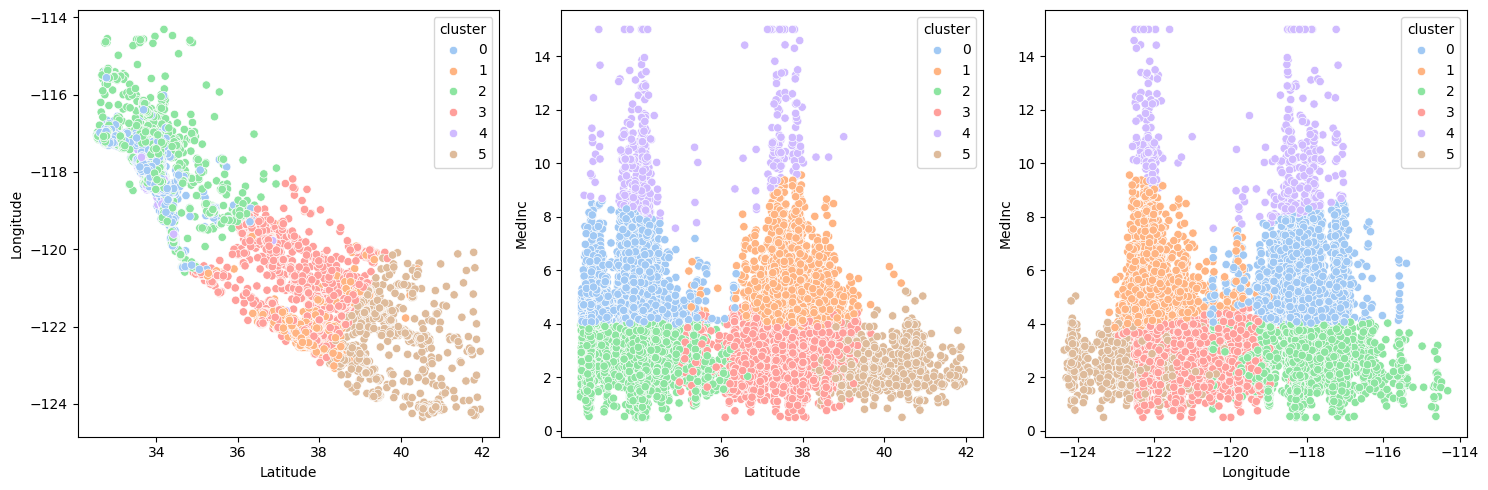

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "pastel")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "pastel")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "pastel")
plt.tight_layout()


plt.show()

From the scatter plots, we can draw some conclusions:

- Latitude vs. Longitude: We can observe how clusters are distributed geographically and the way certain clusters are more predominant in certain areas.
- Latitude and Longitude vs. Median Income: There is some clustering that could suggest geographical or socioeconomic patterns.


Predict with the test set

In [8]:
# Predict cluster labels for the test data
y_test = model.predict(X_test)
X_test["cluster"] = y_test
X_test.head()



,MedInc,Latitude,Longitude,cluster
15722,5.2806,37.78,-122.46,1
19685,1.4661,39.14,-121.61,5
6989,2.6082,33.97,-118.04,2
5804,0.8185,34.15,-118.25,2
5806,2.2614,34.14,-118.26,2


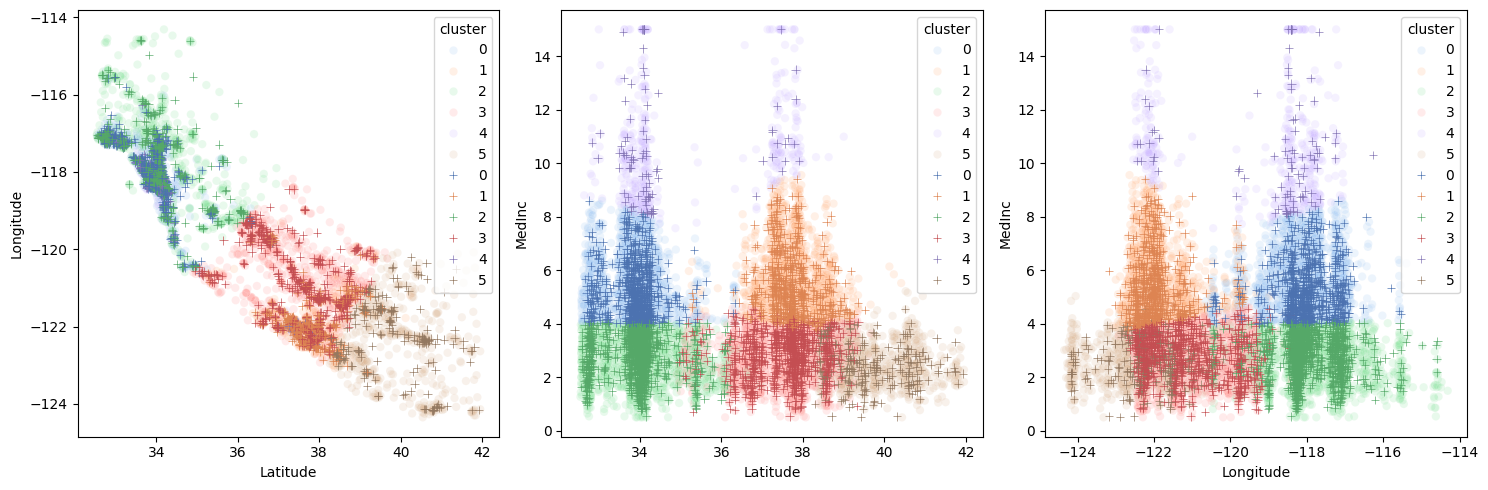

In [9]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "pastel", alpha=0.2)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "pastel", alpha=0.2)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "pastel", alpha=0.2)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
plt.tight_layout()


plt.show()

In [10]:
X_train.head()
X_test.head()

,MedInc,Latitude,Longitude,cluster
15722,5.2806,37.78,-122.46,1
19685,1.4661,39.14,-121.61,5
6989,2.6082,33.97,-118.04,2
5804,0.8185,34.15,-118.25,2
5806,2.2614,34.14,-118.26,2


In [11]:
X_train_sel = X_train.drop(["cluster"], axis = 1)
X_test_sel = X_test.drop(["cluster"], axis = 1)

X_train_sel.to_csv("/workspaces/machine-learning-unsupervised-learning/data/processed/X_train.csv", index = False)
X_test_sel.to_csv("/workspaces/machine-learning-unsupervised-learning/data/processed/X_test.csv", index = False)
X_train['cluster'].to_csv("/workspaces/machine-learning-unsupervised-learning/data/processed/y_train.csv", index = False)
X_test['cluster'].to_csv("/workspaces/machine-learning-unsupervised-learning/data/processed/y_test.csv", index = False)

In [12]:
#Saving the k-means model
from pickle import dump
dump(model, open("/workspaces/machine-learning-unsupervised-learning/models/k-means_clusters-6_8.sav", "wb"))

Train a supervised classification model

In [13]:

#Model initialization and training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 8)
model.fit(X_train_sel, y_train)


DecisionTreeClassifier(random_state=8)

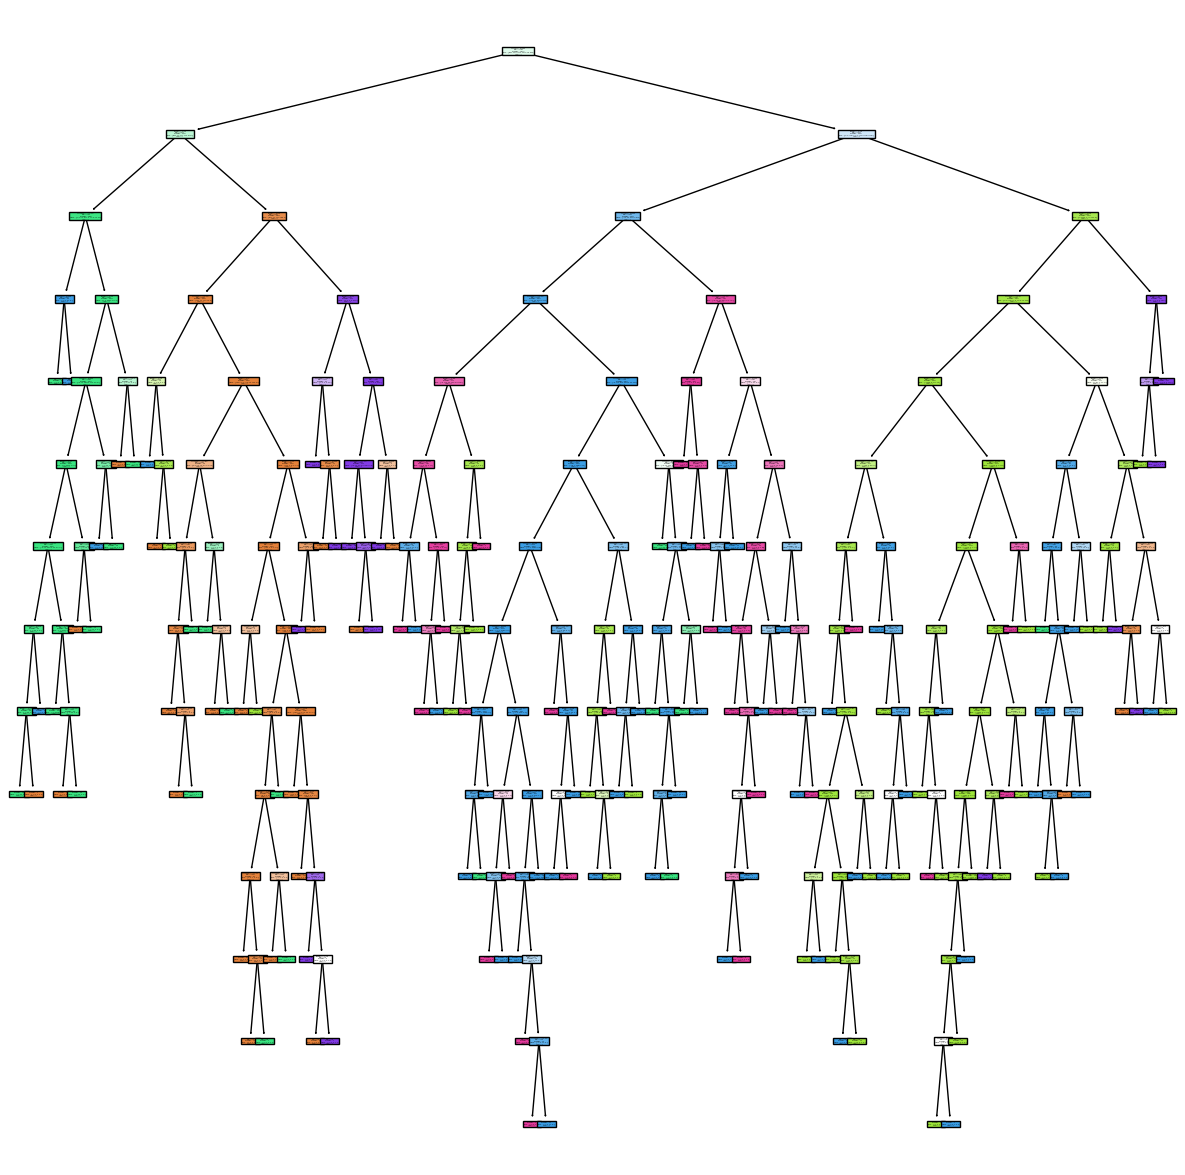

In [14]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train_sel.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [15]:
#Model prediction
y_pred = model.predict(X_test_sel)
y_pred

array([1, 5, 2, ..., 5, 2, 2], dtype=int32)

In [16]:
#Classification
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9932170542635659

I decided to use the Decision Tree model because of the relation between the variables and the characteristics of the dataset, as well as the no need to standardize the values, and the result (99.32%) is quite good.

In [17]:

#Saving the model
from pickle import dump
dump(model, open("/workspaces/machine-learning-unsupervised-learning/models/decision_tree_classifier_default_8.sav", "wb"))